# Asgmt: Support Vector Regression using Housing.csv


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('housing.csv')

X = dataset.drop(columns=['median_house_value']).values     # features
y = dataset['median_house_value'].values     

In [3]:
print(X)

[[-122.23 37.88 41 ... 126 8.3252 'NEAR BAY']
 [-122.22 37.86 21 ... 1138 8.3014 'NEAR BAY']
 [-122.24 37.85 52 ... 177 7.2574 'NEAR BAY']
 ...
 [-121.22 39.43 17 ... 433 1.7 'INLAND']
 [-121.32 39.43 18 ... 349 1.8672 'INLAND']
 [-121.24 39.37 16 ... 530 2.3886 'INLAND']]


In [4]:
print(y)

[452600 358500 352100 ...  92300  84700  89400]


In [5]:
y = y.reshape(len(y),1) # type: ignore

In [6]:
print(y)

[[452600]
 [358500]
 [352100]
 ...
 [ 92300]
 [ 84700]
 [ 89400]]


## Handle Nan Value


In [7]:
missing_values = dataset.isnull().sum() # count of missing values in each column
print(missing_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [8]:
# fill missing values with the mean value of the column (Total Bedrooms)

dataset['total_bedrooms'] = dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].median())


missing_values = dataset.isnull().sum() # count of missing values in each column
print(missing_values)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## Feature Scaling & One Hot Encoding

In [9]:
# Handle NaN for the categorical column before encoding
dataset.iloc[:, 8] = dataset.iloc[:, 8].fillna('Unknown') 

cat_index = [8]    # Ocean Proximity is in column 8
num_index = [i for i in range(X.shape[1]) if i != 8]


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

ct = ColumnTransformer([
    ('num_scaler', StandardScaler(), num_index),   # Scale numerical features
    ('cat', OneHotEncoder(), cat_index)            # OneHotEncode categorical feature
])


In [11]:
X = ct.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)


In [12]:
X = pd.DataFrame(X).fillna(0).values # fill NaN values with 0 for after scaling

In [13]:
print(X)

[[-1.32783522  1.05254828  0.98214266 ...  0.          1.
   0.        ]
 [-1.32284391  1.04318455 -0.60701891 ...  0.          1.
   0.        ]
 [-1.33282653  1.03850269  1.85618152 ...  0.          1.
   0.        ]
 ...
 [-0.8237132   1.77823747 -0.92485123 ...  0.          0.
   0.        ]
 [-0.87362627  1.77823747 -0.84539315 ...  0.          0.
   0.        ]
 [-0.83369581  1.75014627 -1.00430931 ...  0.          0.
   0.        ]]


In [14]:
print(y)

[[ 2.12963148]
 [ 1.31415614]
 [ 1.25869341]
 ...
 [-0.99274649]
 [-1.05860847]
 [-1.01787803]]


## Training the SVR model on the whole dataset

In [15]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf') # Radial Basis Function Kernel
regressor.fit(X, y) # Fit the SVR model to the dataset

c:\IIUM\AI Note IIUM\venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [16]:
y_pred = regressor.predict(X) # Predict the results

In [17]:
y_pred_original_scale = sc_y.inverse_transform(y_pred.reshape(-1, 1)) # Convert the scaled values back to the original scale
y_original_scale = sc_y.inverse_transform(y)                          # Convert the scaled values back to the original scale

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_original_scale, y_pred_original_scale)
mae = mean_squared_error(y_original_scale, y_pred_original_scale)
rmse = np.sqrt(mean_squared_error(y_original_scale, y_pred_original_scale))

print(f'R-squared: {r2:.4f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

R-squared: 0.7757
MAE: 2986320375.07
RMSE: 54647.24


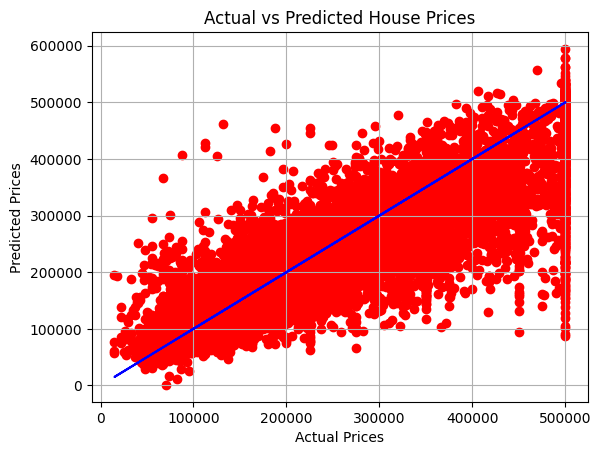

In [19]:

plt.scatter(y_original_scale, y_pred_original_scale, color='Red')
plt.plot(y_original_scale, y_original_scale, color='Blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()